In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris, make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
data = pd.read_csv('segmentation data.csv')
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


Sex / jenis kelamin:
0 = Male
1 = Female
Marital status / status pernikahan:
0 = Single
1 = Non-single (menikah)
Education / pendidikan:
0 = Unknown
1 = High school
2 = Unversity
3 = Graduate
Occupation / pekerjaan:
0 = Unemployed / pengangguran
1 = Skilled employee / pegawai
2 = Management / self-employed / wiraswasta / manager
0 = Small Cities 
1 = Medium Cities
2 = Large Cities

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


1. terdapat 2000 baris dan 8 kolum
2. semua kolum bertipe data integer

In [4]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
data1 = data

In [7]:
data1['Education'] = data1['Education'].map({0:np.nan, 1:'High School', 2:'University', 3:'Graduate'})
data1['Sex'] = data1['Sex'].map({0: 'Male' , 1: 'Female'})
data1['Marital status'] = data1['Marital status'].map({0: 'Single' , 1: 'Non-Single'})
data1['Occupation'] = data1['Occupation'].map({0: 'Unemploeyd' , 1: 'Official Employed', 2:'Self-Employed'})
data1['Settlement size'] = data1['Settlement size'].map({0: 'Small' , 1: 'Medium', 2:'Large'})

In [8]:
data1.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
639,100000640,Male,Single,26,NaN,122693,Official Employed,Small
787,100000788,Male,Single,38,High School,116723,Official Employed,Medium
851,100000852,Male,Single,43,High School,133105,Official Employed,Small
749,100000750,Male,Single,33,High School,115403,Official Employed,Medium
496,100000497,Male,Single,29,NaN,222360,Self-Employed,Large


In [9]:
data1=data1.drop(['ID'], 1)

In [10]:
data1.isnull().sum()

Sex                  0
Marital status       0
Age                  0
Education          287
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [11]:
data1.dropna(axis=0 , inplace=True)

In [12]:
data1.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [12]:
num_data1 = ['Age','Income']
cat_data1 = ['Sex','Marital status','Education','Occupation','Settlement size']

data1[cat_data1] = data1[cat_data1].astype('str')

In [13]:
data1[cat_data1].describe()

,Sex,Marital status,Education,Occupation,Settlement size
count,1713,1713,1713,1713,1713
unique,2,2,3,3,3
top,Female,Non-Single,High School,Official Employed,Small
freq,882,993,1386,945,853


1. mayaritas konsumen jenis kelamin perempuan, orang yang sudah berkeluarga, pegawai dan tinggal dikota kecil

In [14]:
data1[num_data1].describe()

,Age,Income
count,1713.000000,1713.000000
mean,37.333333,121940.607706
std,12.019762,37694.643813
min,18.000000,35832.000000
25%,27.000000,98742.000000
50%,35.000000,116103.000000
75%,44.000000,138644.000000
max,76.000000,309364.000000


1. rata-rata usia adalah 37 tahun, usia tertua adalah 76 tahun, dan usia termudah adalah 18 tahun
2. rata-rata pendapatan adalah 121.940.607.706 dolar

In [15]:
for col in data1:
    print(f'''jumlah data pada kolom {col}:''')
    print(data1[col].value_counts())
    print()

jumlah data pada kolom Sex:
Female    882
Male      831
Name: Sex, dtype: int64

jumlah data pada kolom Marital status:
Non-Single    993
Single        720
Name: Marital status, dtype: int64

jumlah data pada kolom Age:
26    86
35    79
27    77
36    73
25    64
33    62
23    60
34    60
24    59
40    58
28    58
37    56
38    51
42    48
29    47
31    43
30    43
22    40
39    40
32    38
46    35
41    33
43    33
45    31
44    30
49    29
48    29
21    27
47    26
50    23
57    20
20    19
51    19
52    19
54    17
53    16
63    15
64    14
60    13
61    13
58    12
65    12
55    10
56    10
67    10
66     9
62     8
68     7
19     5
59     5
71     5
74     4
73     3
18     3
70     3
75     2
72     1
76     1
Name: Age, dtype: int64

jumlah data pada kolom Education:
High School    1386
University      291
Graduate         36
Name: Education, dtype: int64

jumlah data pada kolom Income:
112227    2
83687     2
133328    2
166712    2
214364    2
         ..
13008

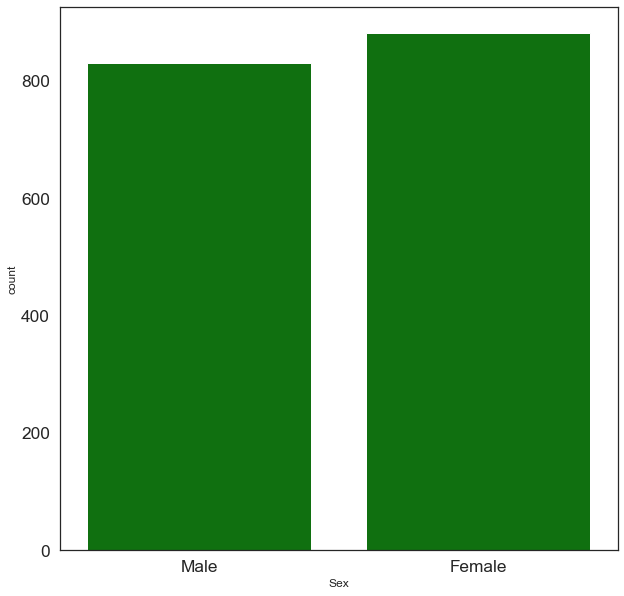

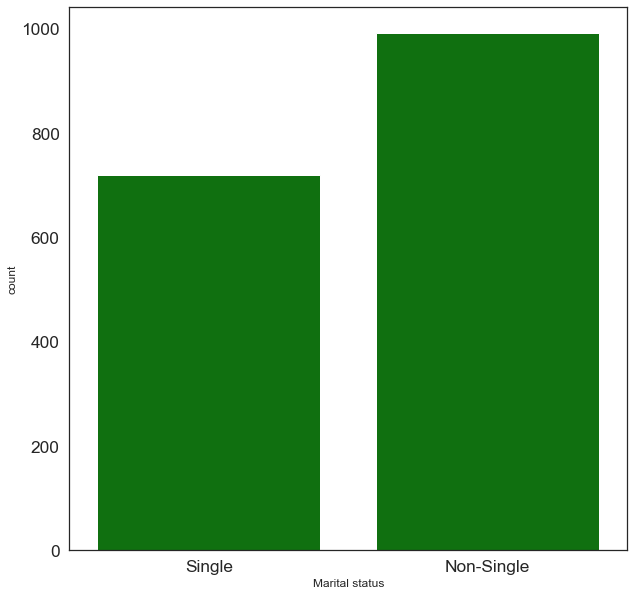

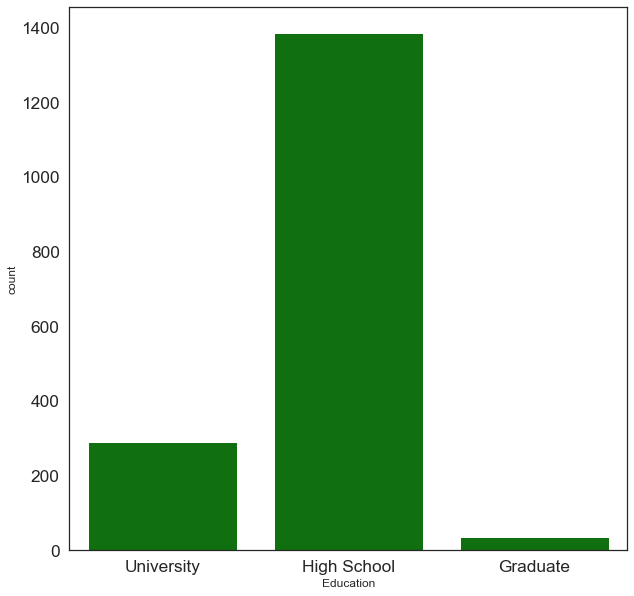

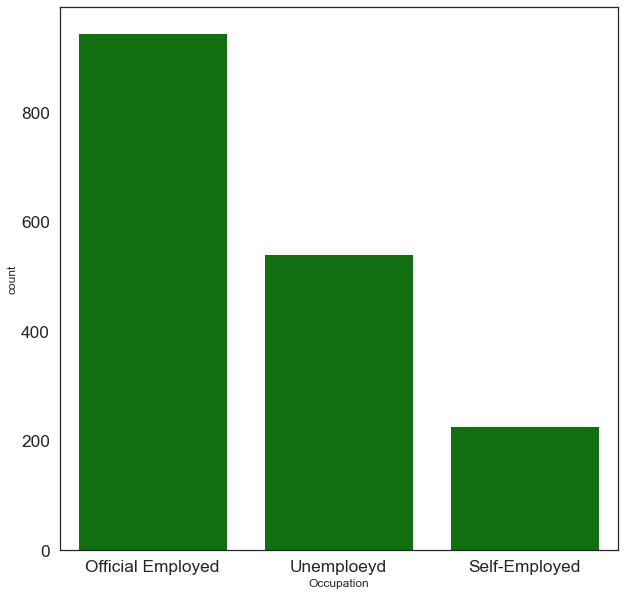

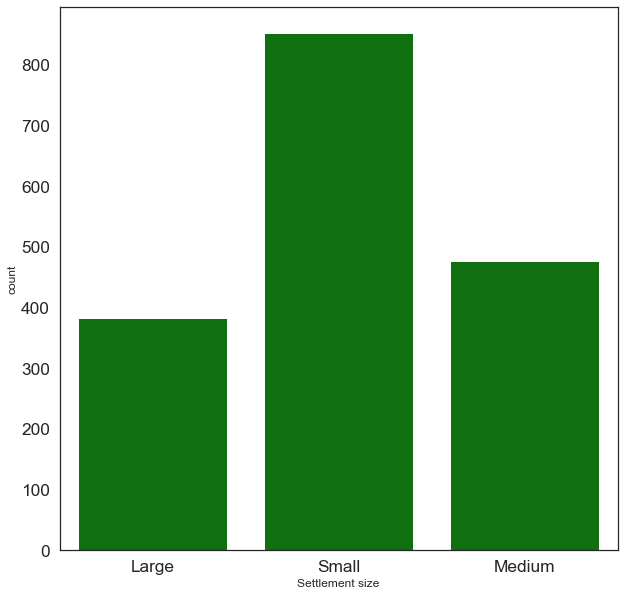

In [16]:
for i in range(0, len(cat_data1)):
    plt.figure()
    sns.countplot(data1[cat_data1[i]], color='green')

1. Jenis kelamin pelanggan cukup seimbang dan Status pernikahan juga seimbang
2. Sebagian besar pelanggan memiliki pendidikan tingkat SMA. Hanya ada 1,8% mahasiswa pascasarjana. 
3. sebagaian besar pelanggan dengan pekerjaan sebagai pegawai dan tinggal dikota kecil  

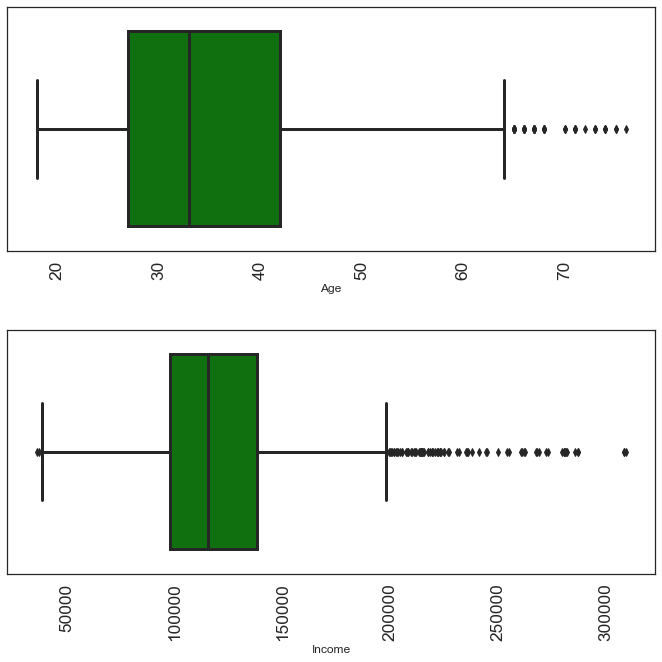

In [17]:
for i in range(0, len(num_data1)):
    plt.subplot(2, len(num_data1)/2, i+1)
    sns.boxplot(data[num_data1[i]], color='green', orient= "v")
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=3)

1. pada kolum Age dan Income terdapat outlier

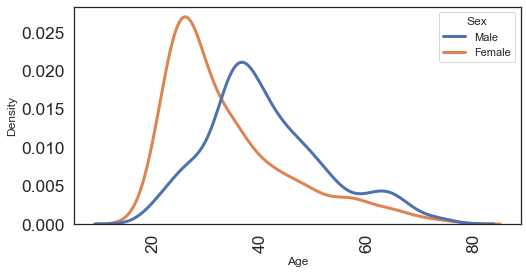

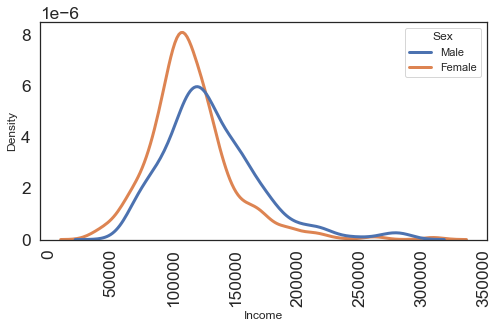

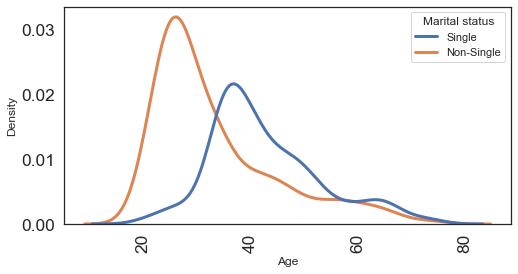

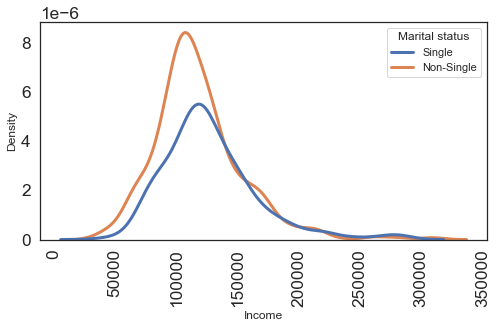

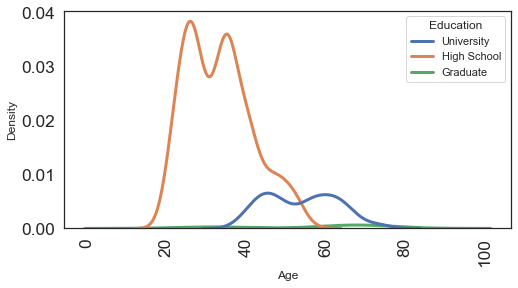

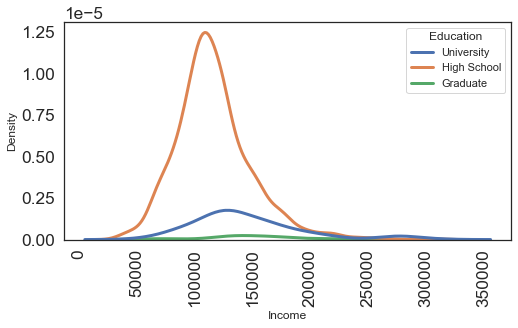

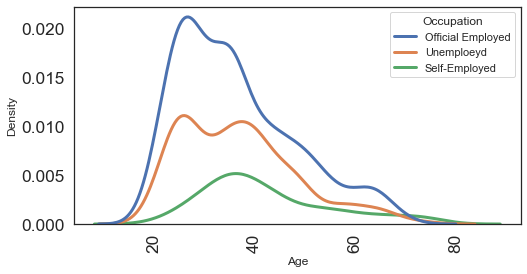

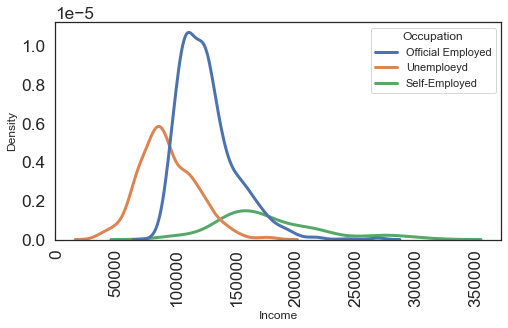

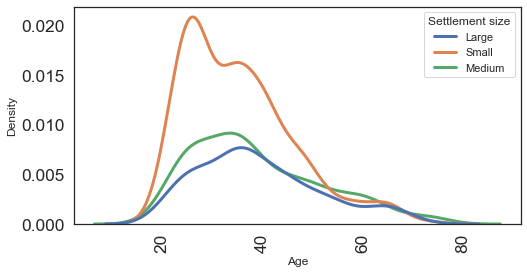

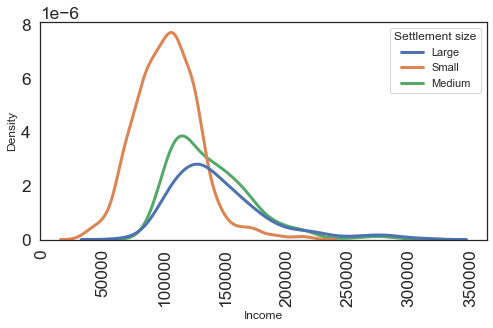

In [18]:
for category in cat_data1:
    for numerical in num_data1:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(data=data1, x=numerical, hue=category)
        plt.xticks(rotation = 90)
        plt.show()

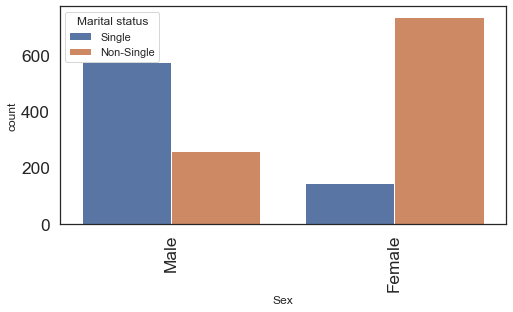

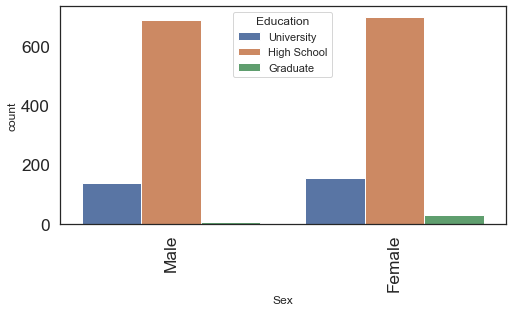

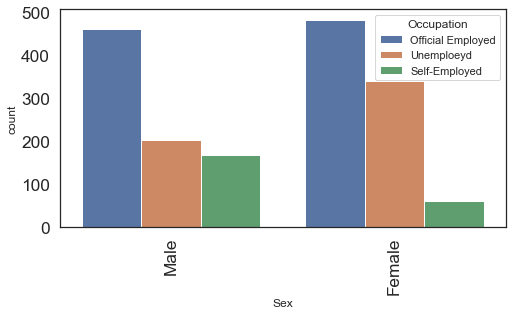

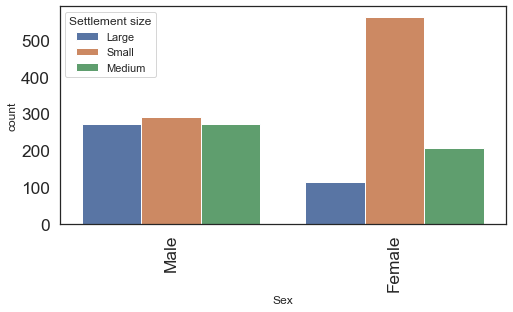

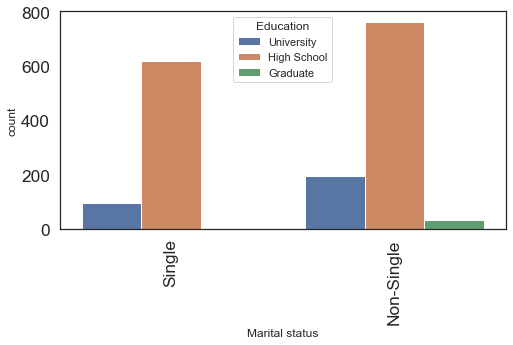

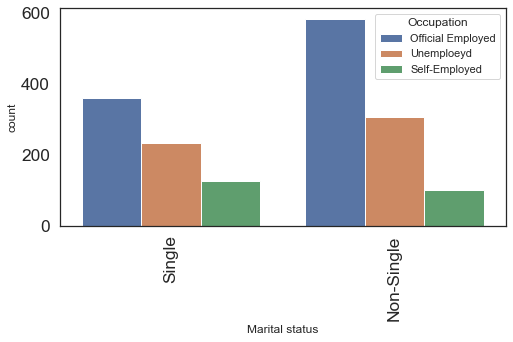

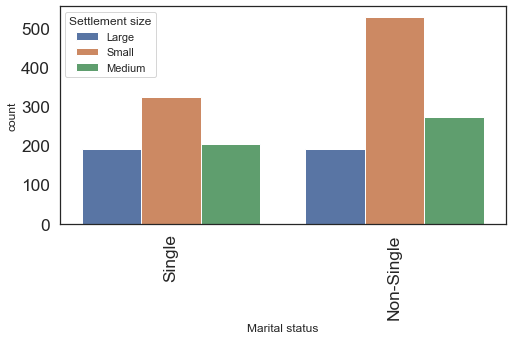

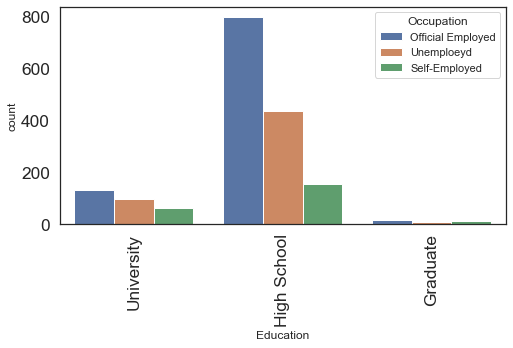

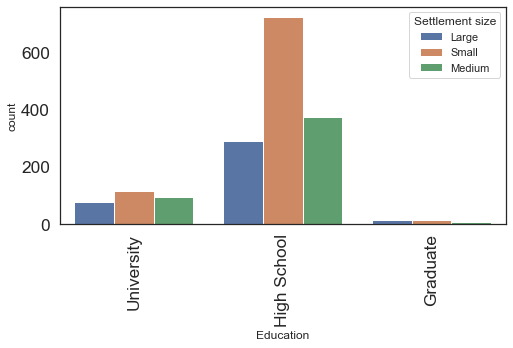

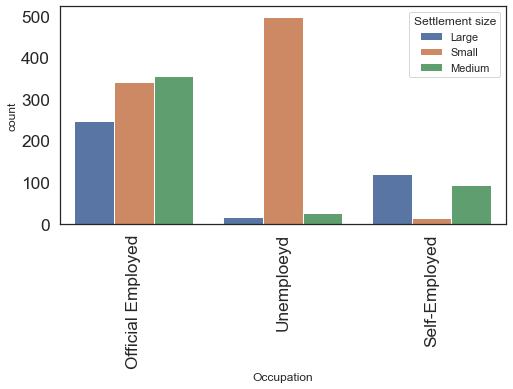

In [19]:
cat_aux = cat_data1.copy()
for category1 in cat_data1:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=data1, x=category1, hue=category2)
            plt.xticks(rotation = 90)
            plt.show()

1. Orang dengan Pekerjaan = '0' (menganggur) cenderung tinggal di kota-kota kecil
2. Orang yang sudah menikah cenderung memiliki pendidikan tingkat SMA atau pascasarjana
3. Orang yang sudah menikah juga cenderung tinggal di kota-kota kecil 
4. Wanita dalam daftar pelanggan cenderung menikah lebih sering daripada pria 
5. Pria cenderung lebih sering dipekerjakan dalam daftar pelanggan. Sebaliknya, wanita dalam kumpulan data cenderung lebih sering menganggur

In [20]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

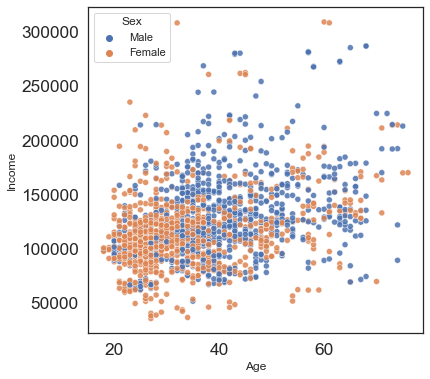

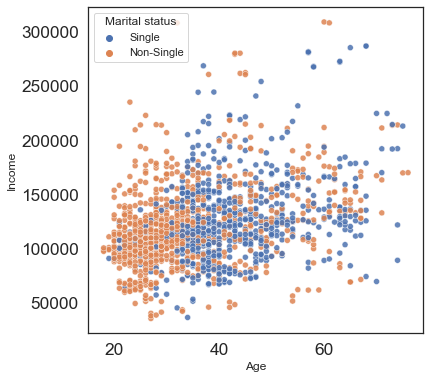

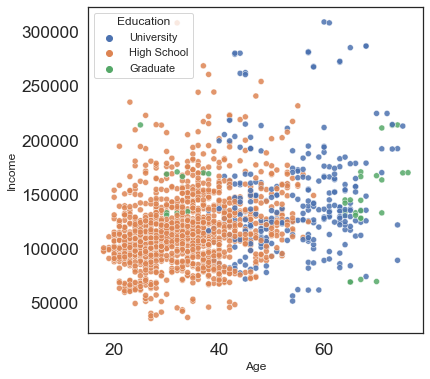

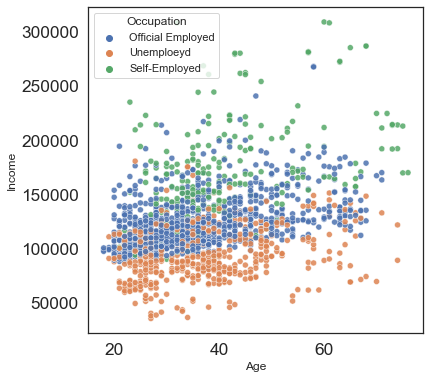

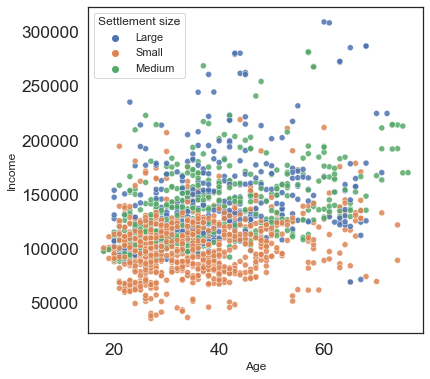

In [21]:
for cat in cat_data1:
    bivariate_scatter('Age', 'Income', cat, data1)

1. Orang yang tinggal di kota kecil cenderung memiliki pendapatan yang lebih rendah 
2. Orang yang memiliki pekerjaan manajerial atau memiliki bisnis memiliki pendapatan lebih tinggi daripada karyawan, yang memiliki pendapatan lebih tinggi daripada yang menganggur
3. Orang yang berpendidikan tinggi cenderung berusia lebih tua, tetapi berpenghasilan tampaknya tidak dipengaruhi oleh tingkat pendidikan
4. Orang yang tidak lajang cenderung memiliki pendapatan lebih rendah dan rata-rata lebih muda daripada orang lajang/single 
5. Pria cenderung memiliki pendapatan yang lebih tinggi daripada wanita ketika mereka lebih tua

In [22]:
from scipy import stats
print(f'jumlah baris sebelum difilter:{len(data1)}')

filtered_entries = ([True] * len(data1))
for col in ['Age', 'Income']:
    zscore = abs(stats.zscore(data1[col]))
    filtered_entries = (zscore < 3) & filtered_entries
data2 = data1[filtered_entries]
print(f'jumlah baris setelah difilter:{len(data2)}')

jumlah baris sebelum difilter:1713
jumlah baris setelah difilter:1680


In [23]:
for col in cat_data1:
    data1[col] = data1[col].astype('category').cat.codes
data1.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1,1,67,2,124670,0,0
1,0,0,22,1,150773,0,0
2,1,1,49,1,89210,2,2
3,1,1,45,1,171565,0,1
4,1,1,53,1,149031,0,1


In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1713 entries, 0 to 1998
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              1713 non-null   int8 
 1   Marital status   1713 non-null   int8 
 2   Age              1713 non-null   int64
 3   Education        1713 non-null   int8 
 4   Income           1713 non-null   int64
 5   Occupation       1713 non-null   int8 
 6   Settlement size  1713 non-null   int8 
dtypes: int64(2), int8(5)
memory usage: 113.1 KB


In [25]:

#scale the data
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data1)

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pca_tranformed_data = pca.fit_transform(scaled)
pca.components_

array([[ 6.95820893e-01,  6.29499402e-01,  1.39575610e-01,
         7.99884478e-03,  7.07881386e-02, -1.32154210e-01,
        -2.78465006e-01],
       [ 3.59690877e-02,  3.50957726e-01,  4.71485306e-02,
         5.71203510e-04, -1.06884815e-01,  7.74235274e-01,
         5.12295780e-01],
       [ 4.92915610e-01, -6.05891385e-01, -1.75521933e-03,
         9.45720725e-02,  2.89158127e-02,  4.97111206e-01,
        -3.64728937e-01],
       [ 5.20707751e-01, -2.95921631e-01, -1.66013186e-01,
        -1.33023007e-01, -1.09066202e-01, -3.45870495e-01,
         6.81554467e-01],
       [ 4.83928130e-03, -9.77658563e-02,  6.11883529e-01,
         7.27799905e-01,  1.66337766e-01, -1.12616939e-01,
         2.14414170e-01],
       [-2.02438436e-02, -1.24113175e-01,  6.82043589e-01,
        -6.64476175e-01,  2.72801993e-01,  1.96447208e-02,
         5.16451317e-02],
       [ 1.97931676e-03,  3.03801234e-02, -3.33387606e-01,
         4.55566209e-02,  9.32064341e-01,  5.72762171e-02,
         1.1758370

In [27]:
X = data1.copy()
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(df_pca)
df_pca.head(5)

,0,1
0,2729.395708,29.356726
1,28832.390356,-18.664531
2,-32730.606162,15.450051
3,49624.392854,1.968270
4,27090.393924,12.551989


In [28]:
#K-Means Clustering
X = df_pca.copy()

from sklearn.cluster import KMeans 

cluster_range = range(1, 15)
cluster_errors = []
cluster_sil_scores = []

for num in cluster_range: 
    clusters = KMeans(num, n_init = 100,init='k-means++',random_state=0)
    clusters.fit(X)
    # capture the cluster lables
    labels = clusters.labels_  
    # capture the centroids
    centroids = clusters.cluster_centers_ 
    # capture the intertia
    cluster_errors.append( clusters.inertia_ )    
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2.432557e+12
1,2,1.016457e+12
2,3,5.747002e+11
3,4,3.296640e+11
4,5,2.183174e+11
5,6,1.477085e+11
6,7,1.098817e+11
7,8,8.079895e+10
8,9,6.613926e+10
9,10,5.358400e+10


Text(0, 0.5, 'error')

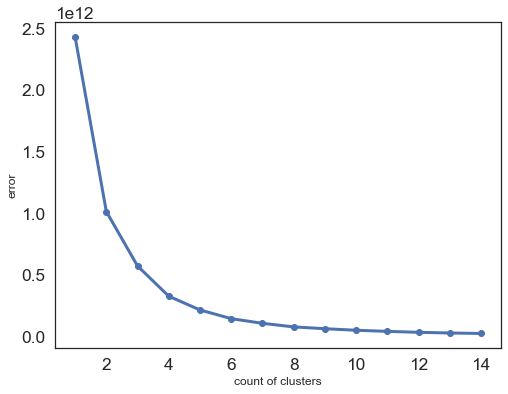

In [29]:
plt.figure(figsize=(8,6))
plt.plot(clusters_df["num_clusters"],clusters_df["cluster_errors"],marker = 'o')
plt.xlabel('count of clusters')
plt.ylabel('error')

In [30]:
from sklearn.metrics import silhouette_samples,silhouette_score
for num in range(2,10):
    clusters = KMeans(n_clusters=num,random_state=0)
    labels = clusters.fit_predict(df_pca)
    
    sil_avg = silhouette_score(df_pca, labels)
    print('For',num,'The Silhouette Score is =',sil_avg)

For 2 The Silhouette Score is = 0.5900608870425696
For 3 The Silhouette Score is = 0.5136717009146287
For 4 The Silhouette Score is = 0.5366655316185561
For 5 The Silhouette Score is = 0.5379769180512308
For 6 The Silhouette Score is = 0.5437111699219901
For 7 The Silhouette Score is = 0.5303728433953029
For 8 The Silhouette Score is = 0.5411320292966785
For 9 The Silhouette Score is = 0.5357250586189672


In [31]:
kmeans = KMeans(n_clusters = 4)
kmeans = kmeans.fit(df_pca)
labels = kmeans.predict(df_pca)
centroids = kmeans.cluster_centers_

print(labels)
print()
print('Cluster Centers')
print(centroids)

[0 2 3 ... 0 0 3]

Cluster Centers
[[-4.32406996e+03 -4.25143627e-01]
 [ 1.14039348e+05 -2.39171841e+00]
 [ 3.78414645e+04  1.03537280e+00]
 [-3.93288164e+04  3.09500710e-01]]


In [32]:
df_pca['Clusters'] = labels
df_pca.sample(10)

,0,1,Clusters
522,65706.391827,-7.874740,2
1370,-83693.608352,-0.717183,3
531,1338.391105,-10.507916,0
301,-13418.609037,-10.810703,0
1683,-11786.608818,-8.998874,0
108,-5400.606548,10.284489,0
673,13149.391939,-3.837976,0
1555,-38253.607964,0.074427,3
1203,-8750.607127,5.705193,0
1492,-44547.606890,9.798828,3


In [33]:
df_pca['Clusters'].value_counts()

0    833
3    452
2    361
1     67
Name: Clusters, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

X = df_pca[[0,1]]
Y = df_pca['Clusters']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=75, stratify=Y)

# instantiate the model
dc=DecisionTreeClassifier()
knn=KNeighborsClassifier(1)


m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[167   0   0   0]
 [  0  13   0   0]
 [  0   0  72   0]
 [  0   0   0  91]]


Accuracy of DecisionTreeClassifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        72
           3       1.00      1.00      1.00        91

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



In [37]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[167   0   0   0]
 [  0  13   0   0]
 [  0   0  72   0]
 [  0   0   0  91]]


Accuracy of K-NeighborsClassifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        72
           3       1.00      1.00      1.00        91

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343

